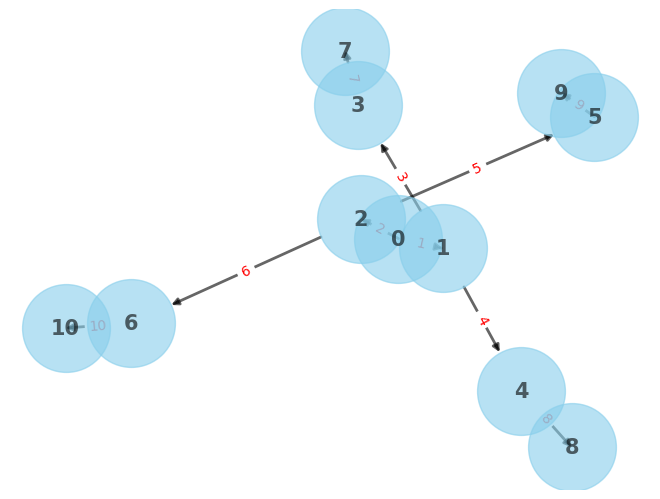

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to plot lineage tree
def plot_lineage_tree(matrix):
    G = nx.DiGraph()
    for mother, daughter, birth_frame in matrix:
        G.add_edge(mother, daughter, birth_frame=birth_frame)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color="skyblue", font_size=15, font_weight="bold",
            alpha=0.6, width=2)
    
    edge_labels = nx.get_edge_attributes(G, 'birth_frame')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.show()

# Generating dummy data
# Format: (mother_index, daughter_index, birth_frame)
dummy_data = [
    (0, 1, 1),
    (0, 2, 2),
    (1, 3, 3),
    (1, 4, 4),
    (2, 5, 5),
    (2, 6, 6),
    (3, 7, 7),
    (4, 8, 8),
    (5, 9, 9),
    (6, 10, 10)
]

# Plot the lineage tree with the dummy data
plot_lineage_tree(dummy_data)


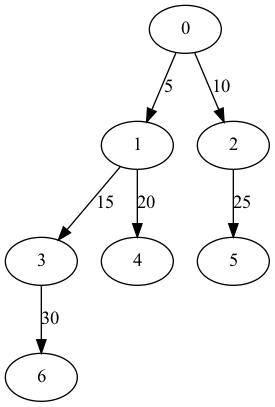

In [3]:
import pygraphviz as pgv
from IPython.display import Image

def plot_lineage_tree(matrix):
    # Create a new graph
    G = pgv.AGraph(directed=True)

    # Add edges to the graph with birth frame as labels
    for mother, daughter, birth_frame in matrix:
        G.add_edge(mother, daughter, label=birth_frame)

    # Render the graph to a file (can be in other formats like png, jpg, etc.)
    G.draw('lineage_tree.png', prog='dot', format='png')

    # Display the graph inline (specific to Jupyter notebooks or IPython environment)
    return Image(filename='lineage_tree.png')

# Sample data
example_matrix = [
    (0, 1, 5),
    (0, 2, 10),
    (1, 3, 15),
    (1, 4, 20),
    (2, 5, 25),
    (3, 6, 30),
]

# Plot the lineage tree
plot_lineage_tree(example_matrix)


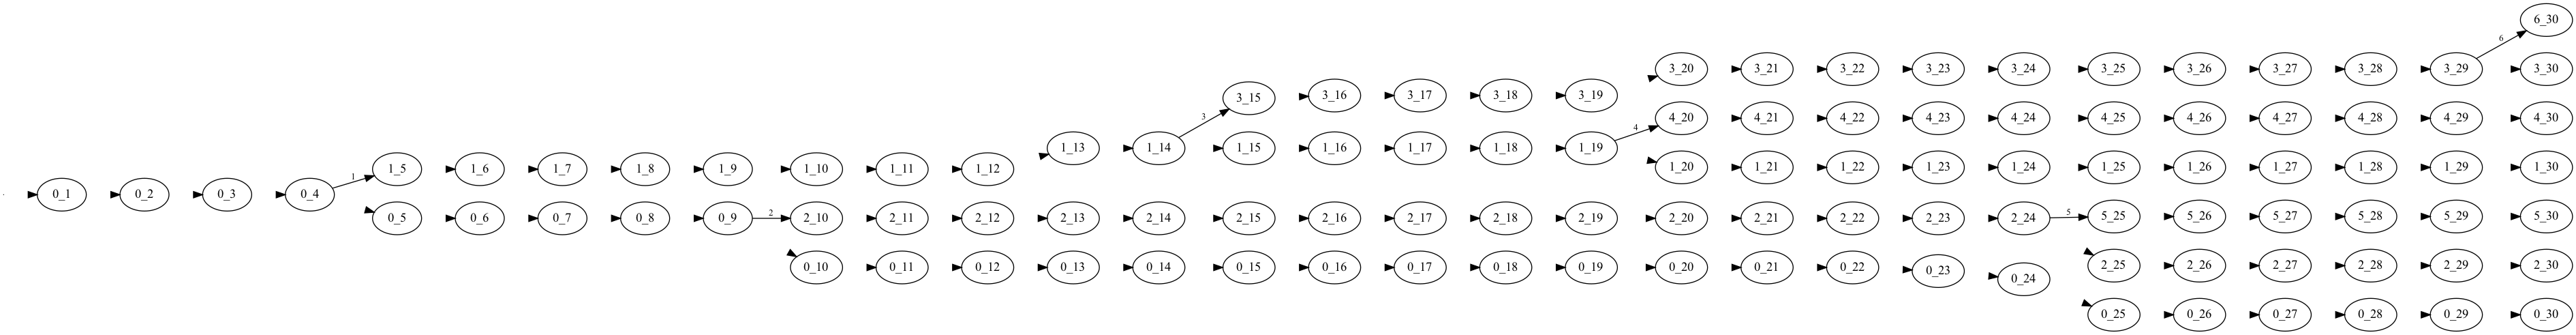

In [4]:
import pygraphviz as pgv
from IPython.display import Image

def plot_lineage_tree(matrix):
    G = pgv.AGraph(directed=True)
    
    # Adding the root
    G.add_node(0, label="", shape="point", width=0)
    
    previous_nodes = {0: 0}
    max_frame = max(matrix, key=lambda x: x[2])[2]
    
    for frame in range(1, max_frame + 1):
        current_nodes = {}
        
        for mother, daughter, birth_frame in matrix:
            if birth_frame == frame:
                mother_node = previous_nodes[mother]
                daughter_node = f"{daughter}_{birth_frame}"
                
                G.add_edge(mother_node, daughter_node, label=daughter, fontsize=10)
                current_nodes[daughter] = daughter_node

                # Extend the mother cell line
                new_mother_node = f"{mother}_{frame}"
                G.add_edge(mother_node, new_mother_node, label="", style="invisible")
                current_nodes[mother] = new_mother_node
        
        for cell, node in previous_nodes.items():
            if cell not in current_nodes:
                # Extend the lines of cells that didn't divide this frame
                new_node = f"{cell}_{frame}"
                G.add_edge(node, new_node, label="", style="invisible")
                current_nodes[cell] = new_node
                
        previous_nodes = current_nodes
    
    # Adjust the graph appearance
    G.graph_attr['rankdir'] = 'LR'
    
    G.draw('lineage_tree.png', prog='dot', format='png')
    return Image(filename='lineage_tree.png')

# Test with sample data, sorted by birth frame to ensure chronological order
example_matrix = sorted([
    (0, 1, 5),
    (0, 2, 10),
    (1, 3, 15),
    (1, 4, 20),
    (2, 5, 25),
    (3, 6, 30),
], key=lambda x: x[2])

plot_lineage_tree(example_matrix)


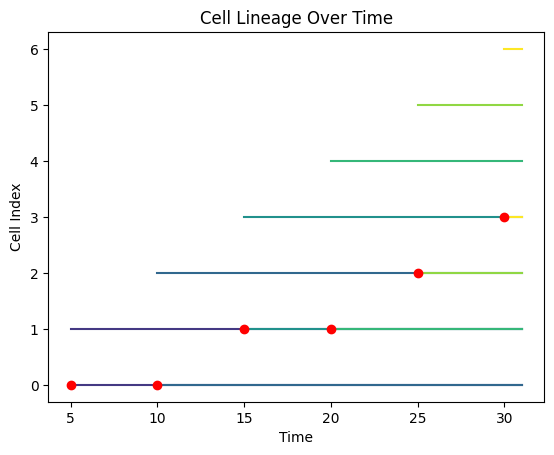

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lineage_tree(matrix):
    fig, ax = plt.subplots()

    max_time = max(matrix, key=lambda x: x[2])[2] + 1
    colors = plt.cm.viridis(np.linspace(0, 1, max_time))

    for mother, daughter, birth_frame in sorted(matrix, key=lambda x: x[2]):
        mother_color = colors[birth_frame]

        # Plot mother cell line
        ax.plot([birth_frame, max_time], [mother, mother], color=mother_color)

        # Plot daughter cell line
        ax.plot([birth_frame, max_time], [daughter, daughter], color=mother_color)

        # Indicate the division event
        ax.plot(birth_frame, mother, 'ro') 

    ax.set_xlabel('Time')
    ax.set_ylabel('Cell Index')
    ax.set_title('Cell Lineage Over Time')
    
    plt.show()

# Test with sample data
example_matrix = [
    (0, 1, 5),
    (0, 2, 10),
    (1, 3, 15),
    (1, 4, 20),
    (2, 5, 25),
    (3, 6, 30),
]

plot_lineage_tree(example_matrix)


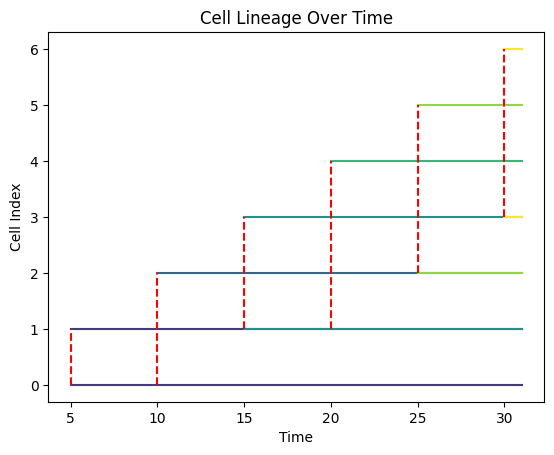

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lineage_tree(matrix):
    fig, ax = plt.subplots()

    max_time = max(matrix, key=lambda x: x[2])[2] + 1
    colors = plt.cm.viridis(np.linspace(0, 1, max_time))

    # Keep track of the cells that have been plotted to avoid redrawing them
    plotted_cells = set()

    for mother, daughter, birth_frame in sorted(matrix, key=lambda x: x[2]):
        mother_color = colors[birth_frame]

        # Plot mother cell line if it hasn't been plotted yet
        if mother not in plotted_cells:
            ax.plot([birth_frame, max_time], [mother, mother], color=mother_color)
            plotted_cells.add(mother)

        # Plot daughter cell line
        ax.plot([birth_frame, max_time], [daughter, daughter], color=mother_color)

        # Indicate the division event with a vertical line
        ax.plot([birth_frame, birth_frame], [mother, daughter], color='red', linestyle='--')

    ax.set_xlabel('Time')
    ax.set_ylabel('Cell Index')
    ax.set_title('Cell Lineage Over Time')

    plt.show()

# Test with sample data
example_matrix = [
    (0, 1, 5),
    (0, 2, 10),
    (1, 3, 15),
    (1, 4, 20),
    (2, 5, 25),
    (3, 6, 30),
]

plot_lineage_tree(example_matrix)


KeyError: 1

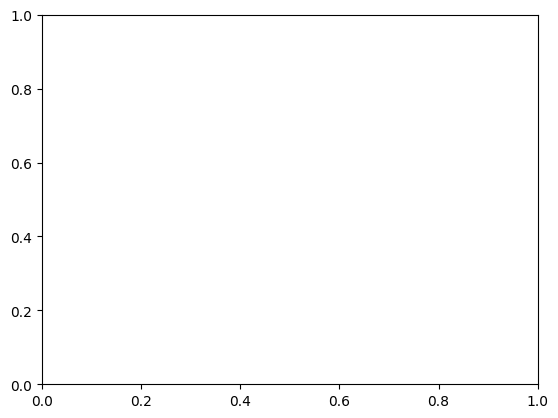

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lineage_tree(matrix):
    fig, ax = plt.subplots()

    max_time = max(matrix, key=lambda x: x[2])[2] + 1
    y_positions = {0: 0}  # Keep track of the y-positions of each cell
    
    for _, daughter, birth_frame in sorted(matrix, key=lambda x: x[2]):
        # Assign a new y-position for each daughter cell
        y_positions[daughter] = len(y_positions)
        
    for mother, daughter, birth_frame in sorted(matrix, key=lambda x: x[2]):
        # Plot mother cell line
        ax.plot([birth_frame, max_time], [y_positions[mother], y_positions[mother]], color='blue')

        # Plot daughter cell line
        ax.plot([birth_frame, max_time], [y_positions[daughter], y_positions[daughter]], color='green')

        # Connect mother and daughter with a vertical line at the time of division
        ax.plot([birth_frame, birth_frame], [y_positions[mother], y_positions[daughter]], color='red', linestyle='--')

        # Label the lines with cell indices
        ax.text(birth_frame, y_positions[daughter], str(daughter), fontsize=9, color='black')

    ax.set_xlabel('Time')
    ax.set_yticks([])  # Hide y-axis ticks
    ax.set_title('Cell Lineage Over Time')

    plt.show()

# Test with sample data
example_matrix = [
    (1,2,0),
    (2,3,3),
    (3,4,5),
    (1,5,6),
    (2,6,8)
]

plot_lineage_tree(example_matrix)


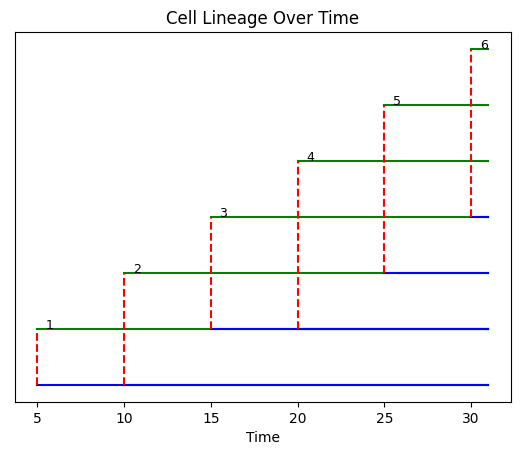

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lineage_tree(matrix):
    fig, ax = plt.subplots()

    max_time = max(matrix, key=lambda x: x[2])[2] + 1
    
    next_y = 0  # The y-coordinate for the next cell line
    cell_lines = {}  # Stores the y-coordinates of cell lines
    
    for mother, daughter, birth_frame in sorted(matrix, key=lambda x: x[2]):
        # If the mother cell line is not yet plotted, add it
        if mother not in cell_lines:
            cell_lines[mother] = next_y
            next_y += 1
        
        # Add the daughter cell line
        cell_lines[daughter] = next_y
        next_y += 1
        
        mother_y = cell_lines[mother]
        daughter_y = cell_lines[daughter]
        
        # Plot the mother cell line
        ax.plot([birth_frame, max_time], [mother_y, mother_y], color='blue')
        
        # Plot the daughter cell line
        ax.plot([birth_frame, max_time], [daughter_y, daughter_y], color='green')
        
        # Add vertical division lines
        ax.plot([birth_frame, birth_frame], [mother_y, daughter_y], color='red', linestyle='--')

        # Label the daughter cell line with the cell index
        ax.text(birth_frame + 0.5, daughter_y, str(daughter), fontsize=9, color='black')

    ax.set_xlabel('Time')
    ax.set_yticks([])  # Hide y-axis ticks
    ax.set_title('Cell Lineage Over Time')

    plt.show()

# Test with sample data
example_matrix = [
    (0, 1, 5),
    (0, 2, 10),
    (1, 3, 15),
    (1, 4, 20),
    (2, 5, 25),
    (3, 6, 30),
]

plot_lineage_tree(example_matrix)


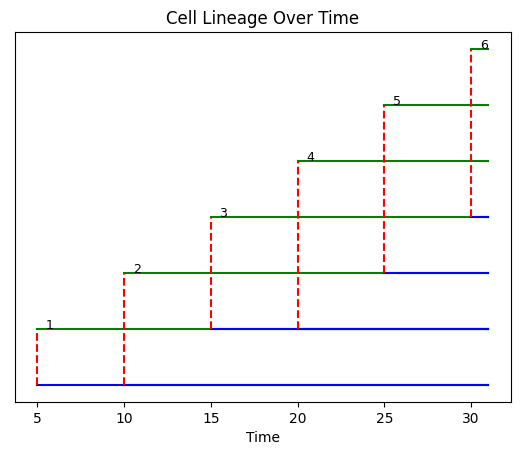

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lineage_tree(matrix):
    fig, ax = plt.subplots()

    max_time = max(matrix, key=lambda x: x[2])[2] + 1

    # Adjust y-positions so each daughter cell is plotted closer to its mother than earlier siblings
    y_positions = {0: 0}

    for mother, daughter, birth_frame in sorted(matrix, key=lambda x: x[2]):
        y_positions[daughter] = max(y_positions.values()) + 1  # Place daughter below previous cells

        # Plot mother cell line
        ax.plot([birth_frame, max_time], [y_positions[mother], y_positions[mother]], color='blue')

        # Plot daughter cell line
        ax.plot([birth_frame, max_time], [y_positions[daughter], y_positions[daughter]], color='green')

        # Connect mother and daughter with a vertical line at the time of division
        ax.plot([birth_frame, birth_frame], [y_positions[mother], y_positions[daughter]], color='red', linestyle='--')

        # Label the lines with cell indices
        ax.text(birth_frame + 0.5, y_positions[daughter], str(daughter), fontsize=9, color='black')

    ax.set_xlabel('Time')
    ax.set_yticks([])  # Hide y-axis ticks
    ax.set_title('Cell Lineage Over Time')

    plt.show()

# Test with sample data
example_matrix = [
    (0, 1, 5),
    (0, 2, 10),
    (1, 3, 15),
    (1, 4, 20),
    (2, 5, 25),
    (3, 6, 30),
]

plot_lineage_tree(example_matrix)


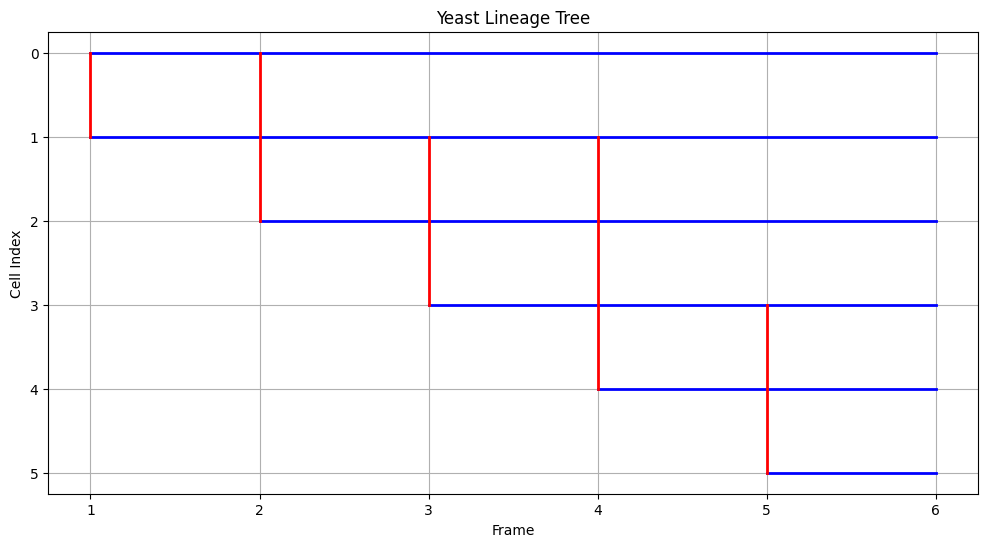

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lineage_tree(matrix):
    max_frame = np.max(matrix[:, 2]) + 1
    max_index = np.max(matrix[:, :2]) + 1
    
    plt.figure(figsize=(12, 6))

    # Draw cells
    for i in range(max_index):
        mask = np.any(matrix[:, :2] == i, axis=1)
        frames = matrix[mask][:, 2]
        
        if len(frames) > 0:
            start_frame = np.min(frames)
        else:
            start_frame = 0

        plt.plot([start_frame, max_frame], [i, i], color='blue', linewidth=2)

    # Draw connections
    for mother, daughter, birth_frame in matrix:
        plt.plot([birth_frame, birth_frame], [mother, daughter], color='red', linewidth=2)

    plt.gca().invert_yaxis()
    plt.xlabel('Frame')
    plt.ylabel('Cell Index')
    plt.title('Yeast Lineage Tree')
    plt.grid(True)
    plt.show()

# Example usage with a sample matrix
# Columns: [mother index, daughter index, birth frame]
matrix = np.array([
    [0, 1, 1],
    [0, 2, 2],
    [1, 3, 3],
    [1, 4, 4],
    [3, 5, 5]
])

plot_lineage_tree(matrix)


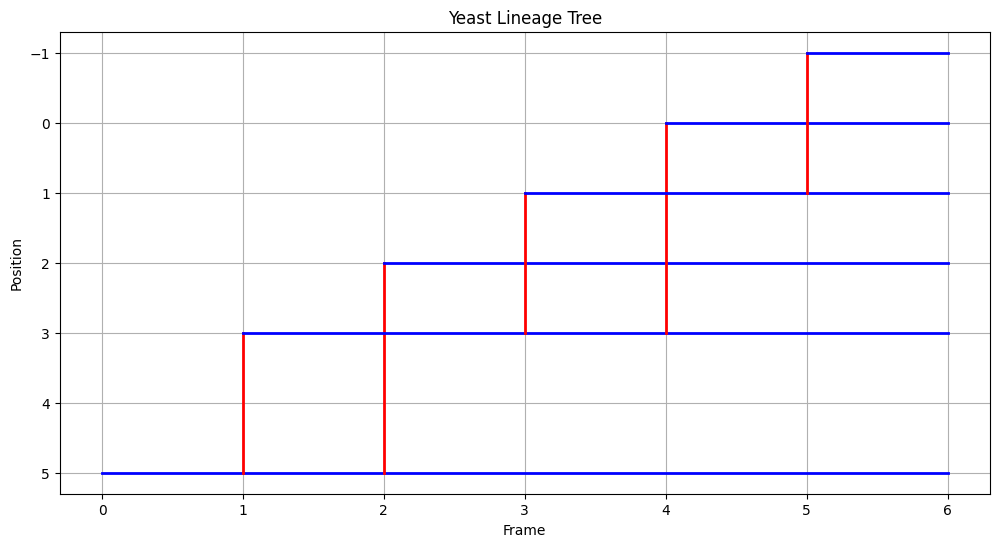

In [17]:
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self, index, birth_frame):
        self.index = index
        self.birth_frame = birth_frame
        self.children = []

def build_tree(matrix):
    nodes = {i: Node(i, 0) for i in np.unique(matrix[:, :2])}
    root_indices = set(nodes.keys())

    for mother, daughter, birth_frame in matrix:
        nodes[daughter].birth_frame = birth_frame
        nodes[mother].children.append(nodes[daughter])
        root_indices.discard(daughter)

    return [nodes[i] for i in root_indices]

def plot_node(node, y):
    # Plot the cell line
    plt.plot([node.birth_frame, max_frame], [y, y], color='blue', linewidth=2)
    
    child_y = y - 1 - len(node.children)
    for child in reversed(node.children):
        # Plot connection to the child
        plt.plot([child.birth_frame, child.birth_frame], [y, child_y], color='red', linewidth=2)
        plot_node(child, child_y)
        child_y += 1

# Example usage with a sample matrix
# Columns: [mother index, daughter index, birth frame]
matrix = np.array([
    [0, 1, 1],
    [0, 2, 2],
    [1, 3, 3],
    [1, 4, 4],
    [3, 5, 5]
])

max_frame = np.max(matrix[:, 2]) + 1
trees = build_tree(matrix)

plt.figure(figsize=(12, 6))
for i, tree in enumerate(trees):
    plot_node(tree, len(matrix) - i * 2)

plt.gca().invert_yaxis()
plt.xlabel('Frame')
plt.ylabel('Position')
plt.title('Yeast Lineage Tree')
plt.grid(True)
plt.show()


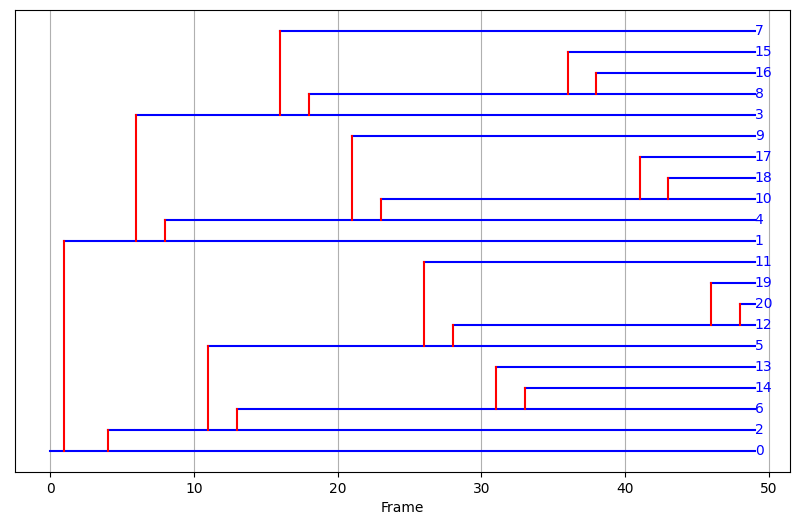

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [0, 1, 1],
    [0, 2, 4],
    [1, 3, 6],
    [1, 4, 8],
    [2, 5, 11],
    [2, 6, 13],
    [3, 7, 16],
    [3, 8, 18],
    [4, 9, 21],
    [4, 10, 23],
    [5, 11, 26],
    [5, 12, 28],
    [6, 13, 31],
    [6, 14, 33],
    [8, 15, 36],
    [8, 16, 38],
    [10, 17, 41],
    [10, 18, 43],
    [12, 19, 46],
    [12, 20, 48]
])


# Sort matrix by mother index then by birth frame
matrix = matrix[np.lexsort((matrix[:,2], matrix[:,0]))]

fig, ax = plt.subplots(figsize=(10, 6))

y_positions = {}

def plot_lineage(mother, start_y):
    global matrix
    daughters = matrix[matrix[:,0] == mother]
    y = start_y

    # Iterate over daughters in reverse order to plot the one born later first
    for daughter in daughters[::-1]:
        _, daughter_index, birth_frame = daughter
        ax.plot([birth_frame, max(matrix[:,2]) + 1], [y, y], color='blue')
        ax.text(max(matrix[:,2]) + 1, y, str(daughter_index), color='blue', verticalalignment='center')

        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')

        y_positions[daughter_index] = y
        y -= 1

        # Recursive call to plot the lineage of the current daughter
        y = plot_lineage(daughter_index, y)

    return y

# Initializing the plot for the first cell
ax.plot([0, max(matrix[:,2]) + 1], [0, 0], color='blue')
ax.text(max(matrix[:,2]) + 1, 0, '0', color='blue', verticalalignment='center')
y_positions[0] = 0

# Start plotting from the first cell
plot_lineage(0, -1)

# Reversing the y axis to have the first cell at the top
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.show()


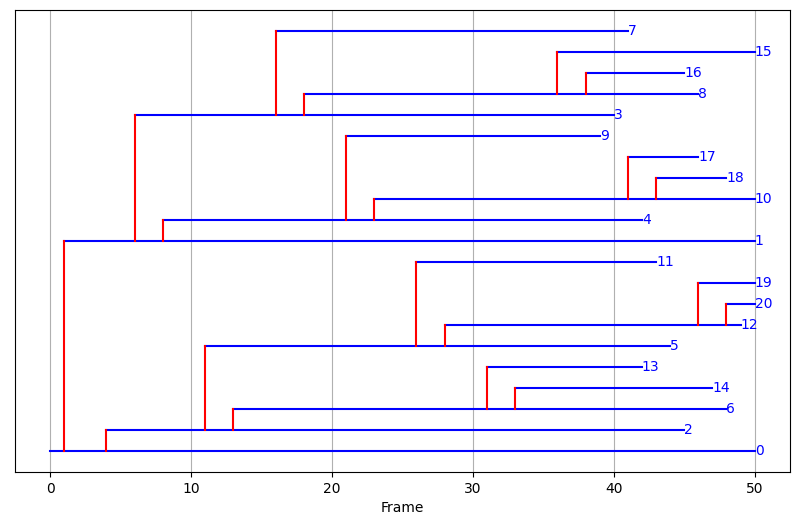

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Expanded matrix with cell death frames
# matrix = np.array([
#     [0, 1, 1, 50],
#     [0, 2, 4, 45],
#     [1, 3, 6, 40],
#     [1, 4, 8, 42],
#     [2, 5, 11, 44],
#     [2, 6, 13, 48],
#     [3, 7, 16, 41],
#     [3, 8, 18, 46],
#     [4, 9, 21, 39],
#     [4, 10, 23, 50],
#     [5, 11, 26, 43],
#     [5, 12, 28, 49],
#     [6, 13, 31, 42],
#     [6, 14, 33, 47],
#     [8, 15, 36, 50],
#     [8, 16, 38, 45],
#     [10, 17, 41, 46],
#     [10, 18, 43, 48],
#     [12, 19, 46, 50],
#     [12, 20, 48, 50]
# ])
matrix = np.array([
    [1,])


# Sort matrix by mother index then by birth frame
matrix = matrix[np.lexsort((matrix[:,2], matrix[:,0]))]

fig, ax = plt.subplots(figsize=(10, 6))

y_positions = {}

def plot_lineage(mother, start_y):
    global matrix
    daughters = matrix[matrix[:,0] == mother]
    y = start_y

    # Iterate over daughters in reverse order to plot the one born later first
    for daughter in daughters[::-1]:
        _, daughter_index, birth_frame, death_frame = daughter
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame, y, str(daughter_index), color='blue', verticalalignment='center')

        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')

        y_positions[daughter_index] = y
        y -= 1

        # Recursive call to plot the lineage of the current daughter
        y = plot_lineage(daughter_index, y)

    return y

# Initializing the plot for the first cell
mother_cell_death_frame = matrix[0, 3]
ax.plot([0, mother_cell_death_frame], [0, 0], color='blue')
ax.text(mother_cell_death_frame, 0, '0', color='blue', verticalalignment='center')
y_positions[0] = 0

# Start plotting from the first cell
plot_lineage(0, -1)

# Reversing the y axis to have the first cell at the top
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.show()


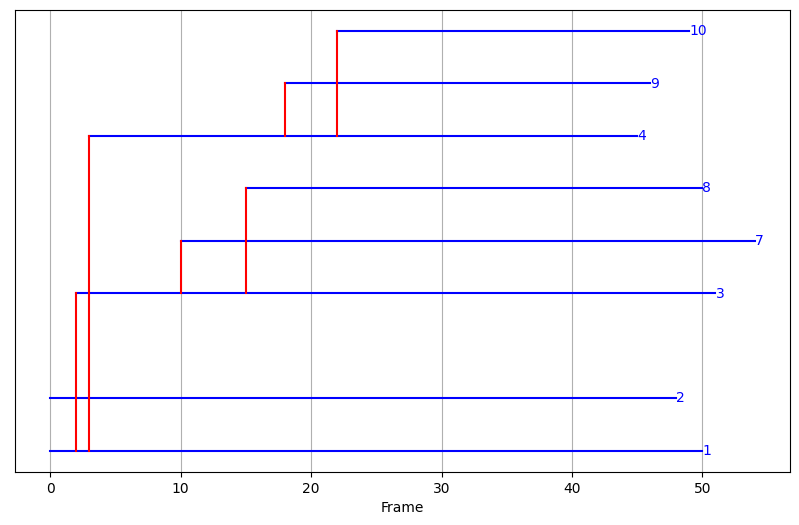

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [1, 0, 50, -1],  # First cell without mother
    [2, 0, 48, -1],  # Second cell without mother
    [3, 2, 51, 1],
    [4, 3, 45, 1],
    [5, 4, 52, 2],
    [6, 5, 53, 2],
    [7, 10, 54, 3],
    [8, 15, 50, 3],
    [9, 18, 46, 4],
    [10, 22, 49, 4]
])

# Sort matrix by mother index then by birth frame
matrix = matrix[np.lexsort((matrix[:,1], matrix[:,3]))]

fig, ax = plt.subplots(figsize=(10, 6))

y_positions = {}
current_y = 0

def plot_lineage(mother, start_y):
    global matrix
    daughters = matrix[matrix[:,3] == mother]
    y = start_y

    # Iterate over daughters
    for daughter in daughters:
        cell_index, birth_frame, death_frame, _ = daughter
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame, y, str(cell_index), color='blue', verticalalignment='center')

        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')

        y_positions[cell_index] = y
        y -= 1

        # Recursive call to plot the lineage of the current daughter
        y = plot_lineage(cell_index, y)

    return y

# Start plotting for cells without mothers
no_mothers = matrix[matrix[:,3] == -1]
for row in no_mothers:
    cell_index, birth_frame, death_frame, _ = row
    ax.plot([birth_frame, death_frame], [current_y, current_y], color='blue')
    ax.text(death_frame, current_y, str(cell_index), color='blue', verticalalignment='center')
    y_positions[cell_index] = current_y
    current_y -= 1

# Start plotting from the first cell with a mother
plot_lineage(1, current_y - 1)

# Reversing the y axis to have the first cell at the top
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.show()


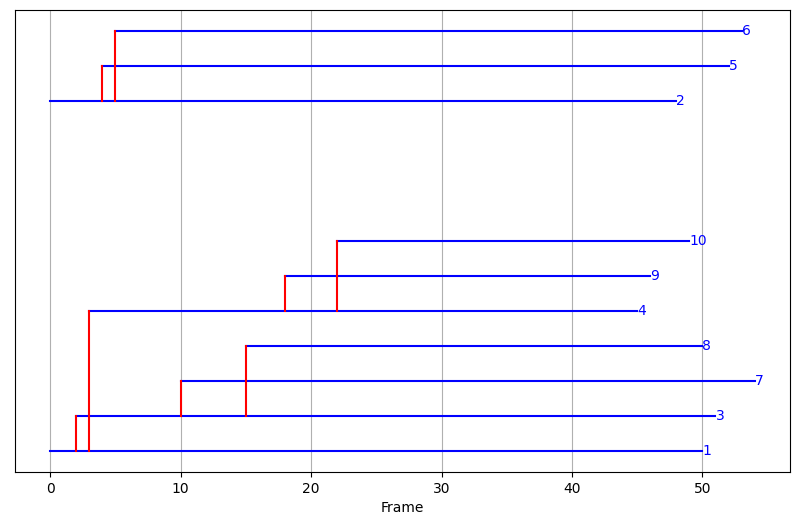

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [1, 0, 50, -1],  # First cell without mother
    [2, 0, 48, -1],  # Second cell without mother
    [3, 2, 51, 1],
    [4, 3, 45, 1],
    [5, 4, 52, 2],
    [6, 5, 53, 2],
    [7, 10, 54, 3],
    [8, 15, 50, 3],
    [9, 18, 46, 4],
    [10, 22, 49, 4]
])

# Calculate the depth of each lineage (i.e., number of generations)
def get_depth(cell_index, lineage_matrix):
    daughters = lineage_matrix[lineage_matrix[:,3] == cell_index]
    if daughters.size == 0:
        return 1
    else:
        return 1 + max([get_depth(daughter[0], lineage_matrix) for daughter in daughters])

# Plot the lineage starting from a mother cell
def plot_lineage(mother, start_y, lineage_matrix):
    daughters = lineage_matrix[lineage_matrix[:,3] == mother]
    y = start_y

    # Iterate over daughters
    for daughter in daughters:
        cell_index, birth_frame, death_frame, _ = daughter
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame, y, str(cell_index), color='blue', verticalalignment='center')

        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')

        y_positions[cell_index] = y
        y -= 1

        # Recursive call to plot the lineage of the current daughter
        y = plot_lineage(cell_index, y, lineage_matrix)

    return y

fig, ax = plt.subplots(figsize=(10, 6))

y_positions = {}
current_y = 0

# Find all cells without mothers
no_mothers = matrix[matrix[:,3] == -1]

# Sort the cells without mothers based on depth
sorted_no_mothers = sorted(no_mothers, key=lambda x: get_depth(x[0], matrix), reverse=True)

# Plot each lineage individually while respecting the depth
for row in sorted_no_mothers:
    cell_index, birth_frame, death_frame, _ = row
    ax.plot([birth_frame, death_frame], [current_y, current_y], color='blue')
    ax.text(death_frame, current_y, str(cell_index), color='blue', verticalalignment='center')
    y_positions[cell_index] = current_y

    # Start plotting from the current cell with a mother
    depth = get_depth(cell_index, matrix)
    current_y = plot_lineage(cell_index, current_y - 1, matrix) - depth

# Reversing the y axis to have the first cell at the top
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.show()


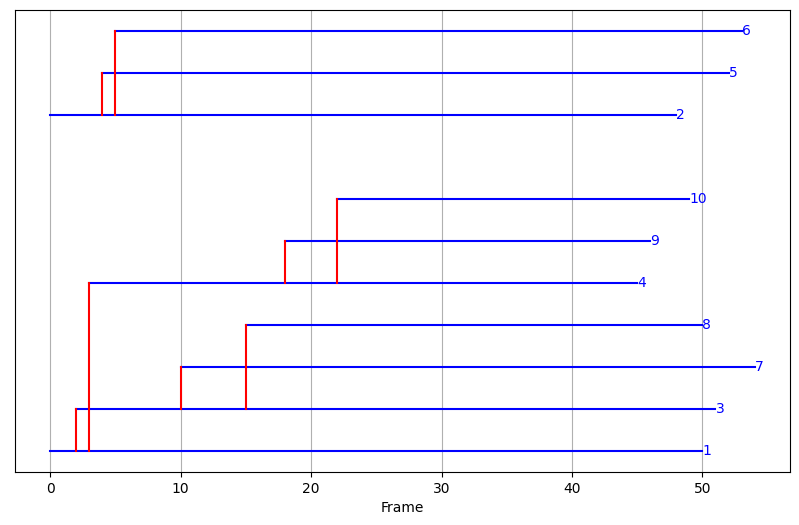

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [1, 0, 50, -1],  # First cell without mother
    [2, 0, 48, -1],  # Second cell without mother
    [3, 2, 51, 1],
    [4, 3, 45, 1],
    [5, 4, 52, 2],
    [6, 5, 53, 2],
    [7, 10, 54, 3],
    [8, 15, 50, 3],
    [9, 18, 46, 4],
    [10, 22, 49, 4]
])

# Calculate the depth of each lineage (i.e., number of generations)
def get_depth(cell_index, lineage_matrix):
    daughters = lineage_matrix[lineage_matrix[:,3] == cell_index]
    if daughters.size == 0:
        return 1
    else:
        return 1 + max([get_depth(daughter[0], lineage_matrix) for daughter in daughters])

# Plot the lineage starting from a mother cell
def plot_lineage(mother, start_y, lineage_matrix):
    daughters = lineage_matrix[lineage_matrix[:,3] == mother]
    y = start_y

    # Iterate over daughters
    for daughter in daughters:
        cell_index, birth_frame, death_frame, _ = daughter
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame, y, str(cell_index), color='blue', verticalalignment='center')

        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')

        y_positions[cell_index] = y
        y -= 1

        # Recursive call to plot the lineage of the current daughter
        y = plot_lineage(cell_index, y, lineage_matrix)

    return y

fig, ax = plt.subplots(figsize=(10, 6))

y_positions = {}
current_y = 0
padding = 1  # Adjust this value to bring lineages closer or farther apart

# Find all cells without mothers
no_mothers = matrix[matrix[:,3] == -1]

# Sort the cells without mothers based on depth
sorted_no_mothers = sorted(no_mothers, key=lambda x: get_depth(x[0], matrix), reverse=True)

# Plot each lineage individually while respecting the depth
for row in sorted_no_mothers:
    cell_index, birth_frame, death_frame, _ = row
    ax.plot([birth_frame, death_frame], [current_y, current_y], color='blue')
    ax.text(death_frame, current_y, str(cell_index), color='blue', verticalalignment='center')
    y_positions[cell_index] = current_y

    # Start plotting from the current cell with a mother
    depth = get_depth(cell_index, matrix)
    current_y = plot_lineage(cell_index, current_y - 1, matrix) - padding

# Reversing the y axis to have the first cell at the top
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.show()


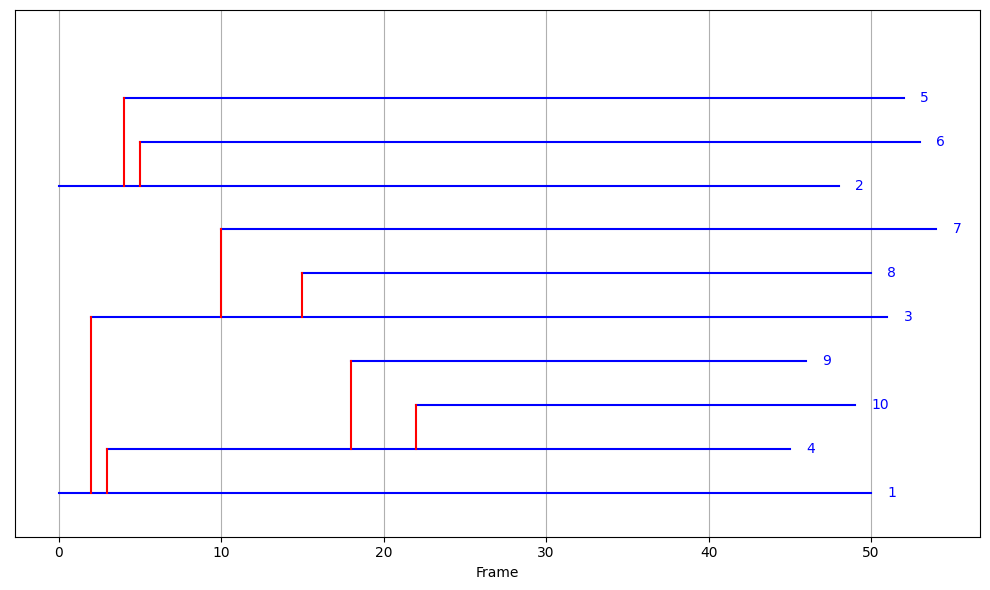

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [1, 0, 50, -1],  # First cell without mother
    [2, 0, 48, -1],  # Second cell without mother
    [3, 2, 51, 1],
    [4, 3, 45, 1],
    [5, 4, 52, 2],
    [6, 5, 53, 2],
    [7, 10, 54, 3],
    [8, 15, 50, 3],
    [9, 18, 46, 4],
    [10, 22, 49, 4]
])

fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to keep track of y-positions
y_positions = {}
current_y = 0  # Starting position

# Plot the lineage starting from a mother cell
def plot_lineage(mother, y):
    global matrix
    daughters = matrix[matrix[:,3] == mother]
    
    # Sort daughters by birth_frame so we process the latest born first
    daughters = daughters[daughters[:,1].argsort()[::-1]]

    for daughter in daughters:
        cell_index, birth_frame, death_frame, _ = daughter
        y += 1
        
        # Make sure this y value is not already occupied
        while y in y_positions.values():
            y += 1
            
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame+1, y, str(cell_index), color='blue', verticalalignment='center', horizontalalignment='left')
        
        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')
        
        y_positions[cell_index] = y
        
        # Recursively plot the lineage for the daughter
        y = plot_lineage(cell_index, y)
        
    return y

# Start with cells that don't have mothers
no_mothers = matrix[matrix[:,3] == -1]

for row in no_mothers:
    cell_index, birth_frame, death_frame, _ = row
    ax.plot([birth_frame, death_frame], [current_y, current_y], color='blue')
    ax.text(death_frame+1, current_y, str(cell_index), color='blue', verticalalignment='center', horizontalalignment='left')
    y_positions[cell_index] = current_y
    current_y = plot_lineage(cell_index, current_y) + 1

ax.set_ylim(-1, current_y + 1)
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.tight_layout()  # To ensure that all labels fit in the figure
plt.show()


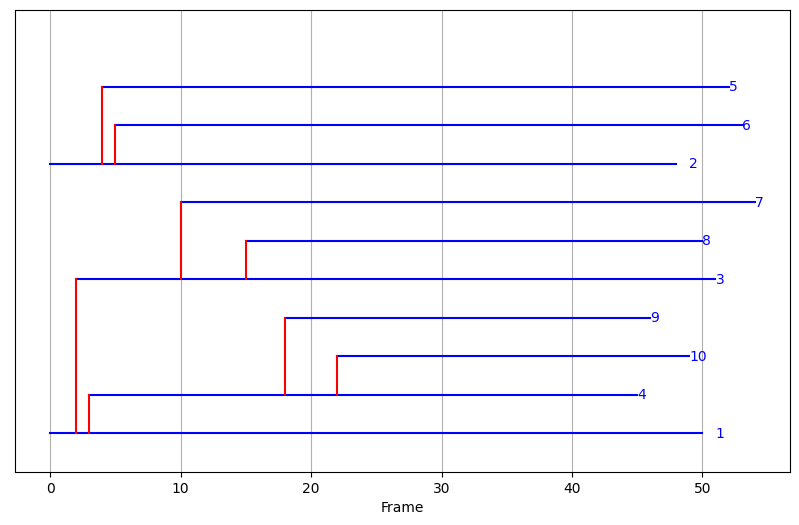

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [1, 0, 50, -1],  # First cell without mother
    [2, 0, 48, -1],  # Second cell without mother
    [3, 2, 51, 1],
    [4, 3, 45, 1],
    [5, 4, 52, 2],
    [6, 5, 53, 2],
    [7, 10, 54, 3],
    [8, 15, 50, 3],
    [9, 18, 46, 4],
    [10, 22, 49, 4]
])

fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to keep track of y-positions
y_positions = {}
current_y = 0  # Starting position

# Plot the lineage starting from a mother cell
def plot_lineage(mother, y):
    global matrix
    daughters = matrix[matrix[:,3] == mother]
    
    # Sort daughters by birth_frame so we process the latest born first
    daughters = daughters[daughters[:,1].argsort()[::-1]]

    for daughter in daughters:
        cell_index, birth_frame, death_frame, _ = daughter
        y += 1
        
        # Make sure this y value is not already occupied
        while y in y_positions.values():
            y += 1
            
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame+1, y, str(cell_index), color='blue', verticalalignment='center', horizontalalignment='left')
        
        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')
        
        y_positions[cell_index] = y
        
        # Recursively plot the lineage for the daughter
        y = plot_lineage(cell_index, y)
        
    return y

# Start with cells that don't have mothers
no_mothers = matrix[matrix[:,3] == -1]

for row in no_mothers:
    cell_index, birth_frame, death_frame, _ = row
    ax.plot([birth_frame, death_frame], [current_y, current_y], color='blue')
    ax.text(death_frame+1, current_y, str(cell_index), color='blue', verticalalignment='center', horizontalalignment='left')
    y_positions[cell_index] = current_y
    current_y = plot_lineage(cell_index, current_y) + 1

ax.set_ylim(-1, current_y + 1)
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.show()


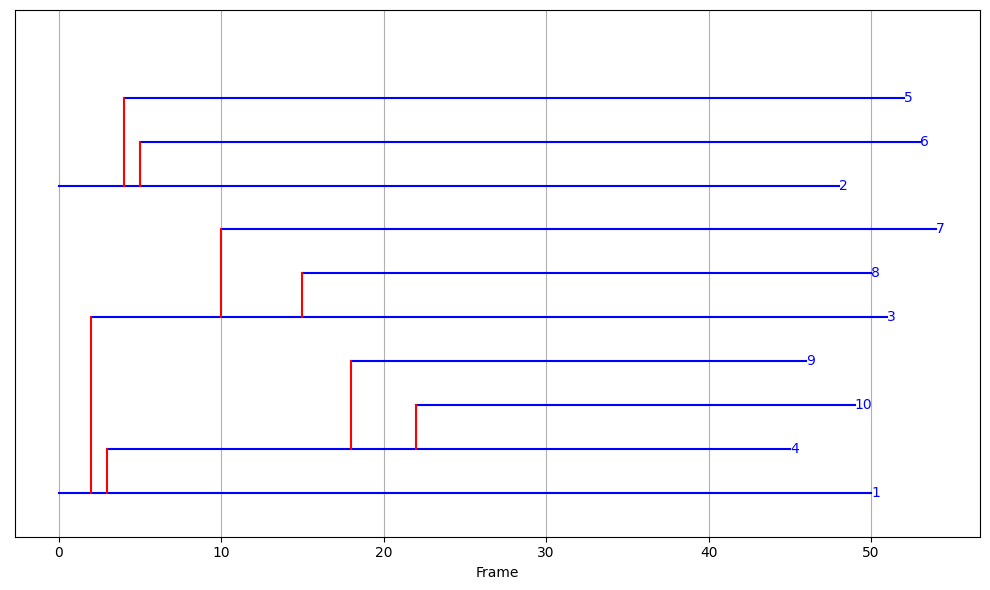

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Sample lineage data
matrix = np.array([
    [1, 0, 50, -1],  # First cell without mother
    [2, 0, 48, -1],  # Second cell without mother
    [3, 2, 51, 1],
    [4, 3, 45, 1],
    [5, 4, 52, 2],
    [6, 5, 53, 2],
    [7, 10, 54, 3],
    [8, 15, 50, 3],
    [9, 18, 46, 4],
    [10, 22, 49, 4]
])

fig, ax = plt.subplots(figsize=(10, 6))

# Dictionary to keep track of y-positions
y_positions = {}
current_y = 0  # Starting position

# Plot the lineage starting from a mother cell
def plot_lineage(mother, y):
    global matrix
    daughters = matrix[matrix[:,3] == mother]
    
    # Sort daughters by birth_frame so we process the latest born first
    daughters = daughters[daughters[:,1].argsort()[::-1]]

    for daughter in daughters:
        cell_index, birth_frame, death_frame, _ = daughter
        y += 1
        
        # Make sure this y value is not already occupied
        while y in y_positions.values():
            y += 1
            
        ax.plot([birth_frame, death_frame], [y, y], color='blue')
        ax.text(death_frame, y, str(cell_index), color='blue', verticalalignment='center', horizontalalignment='left')
        
        if mother in y_positions:
            ax.plot([birth_frame, birth_frame], [y_positions[mother], y], color='red')
        
        y_positions[cell_index] = y
        
        # Recursively plot the lineage for the daughter
        y = plot_lineage(cell_index, y)
        
    return y

# Start with cells that don't have mothers
no_mothers = matrix[matrix[:,3] == -1]

for row in no_mothers:
    cell_index, birth_frame, death_frame, _ = row
    ax.plot([birth_frame, death_frame], [current_y, current_y], color='blue')
    ax.text(death_frame, current_y, str(cell_index), color='blue', verticalalignment='center', horizontalalignment='left')
    y_positions[cell_index] = current_y
    current_y = plot_lineage(cell_index, current_y) + 1

ax.set_ylim(-1, current_y + 1)
ax.set_xlabel('Frame')
ax.get_yaxis().set_visible(False)  # Hide the y-axis labels
plt.grid(True)
plt.tight_layout()  # To ensure that all labels fit in the figure
plt.show()
